In [13]:
import kagglehub
import pandas as pd
import os


path = kagglehub.dataset_download("zahranusrat/salary")
print("Path to dataset files:", path)


csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)


df = pd.read_csv(csv_path)

# Show the first 5 rows
df.head()


Path to dataset files: C:\Users\lenovo t495s\.cache\kagglehub\datasets\zahranusrat\salary\versions\1


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [14]:

df.info()


df.describe()
# gives the summary statistics for the Count, mean, standard deviation, min, max, quartile

# Check for missing values
df.isnull().sum()


categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                       'employee_residence', 'company_location', 'company_size']
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'PT' 'FL']
job_title: ['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Appli

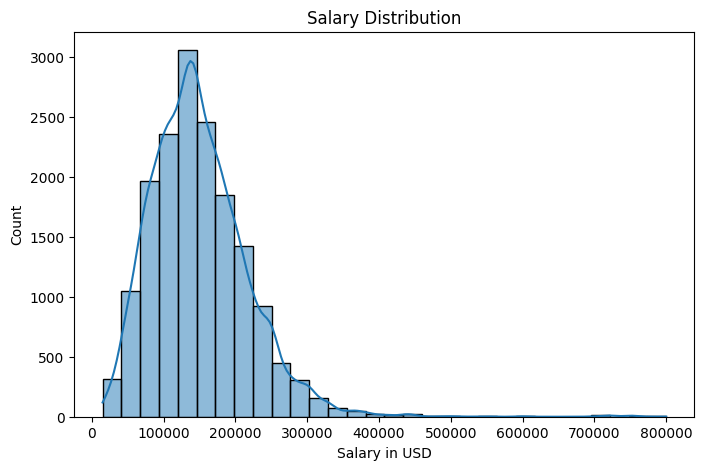

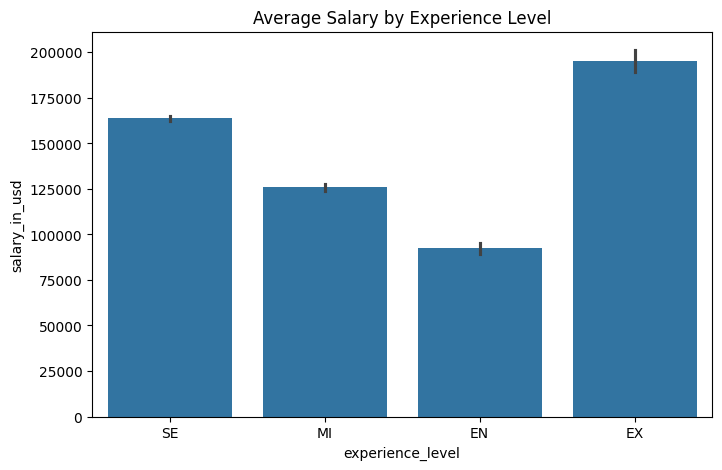

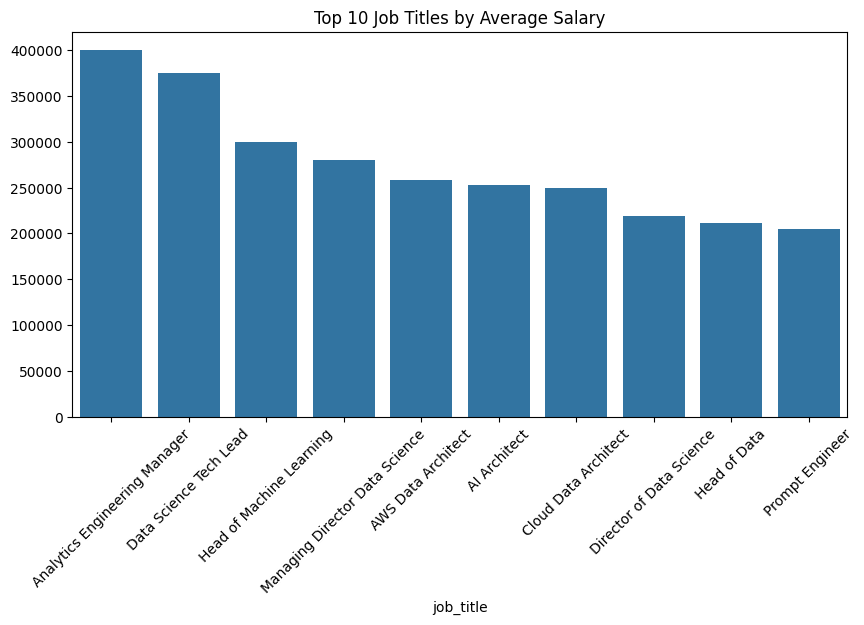

In [15]:
# now here for data visulaizaion 

import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

# Average salary by experience level
plt.figure(figsize=(8,5))
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Average Salary by Experience Level')
plt.show()

# Top 10 job titles by average salary
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.xticks(rotation=45)
plt.title('Top 10 Job Titles by Average Salary')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
# We'll predict 'salary_in_usd'
X = df[['experience_level', 'employment_type', 'job_title', 
        'employee_residence', 'company_location', 'company_size', 'remote_ratio']]
y = df['salary_in_usd']

# One-hot encode categorical columns
categorical_cols = ['experience_level', 'employment_type', 'job_title', 
                    'employee_residence', 'company_location', 'company_size']

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (13227, 326)
X_test shape: (3307, 326)
y_train shape: (13227,)
y_test shape: (3307,)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 3369268007.3000946
R-squared Score: 0.2953775540450886


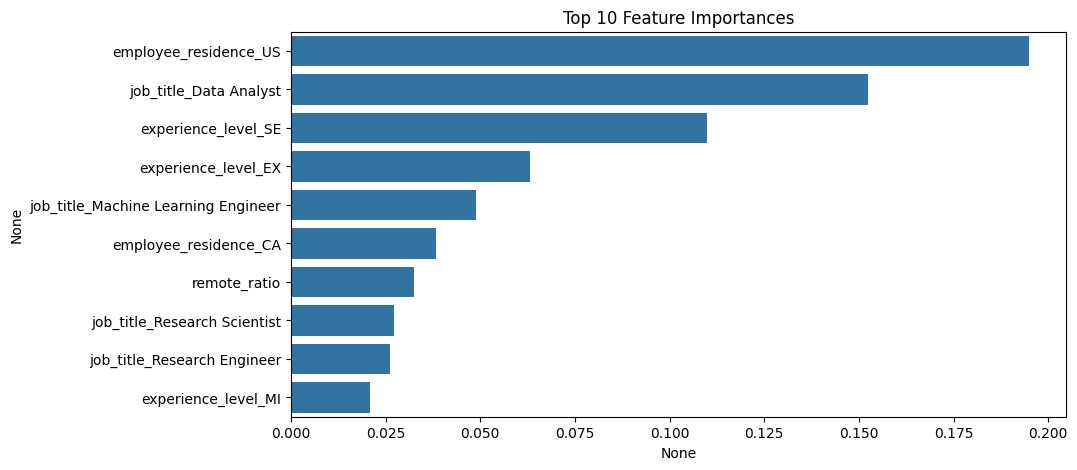

In [18]:

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)


plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.show()


In [19]:
# Create a DataFrame to compare actual and predicted salaries
comparison = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': y_pred
})


comparison.head(10)


,Actual Salary,Predicted Salary
13835,152380,124788.922210
8544,150000,126210.235192
327,51772,63738.150810
10868,138900,124788.922210
5157,237600,175486.173689
5391,112000,171894.377560
16022,60000,75076.155714
7157,167500,160292.052406
14016,90000,130461.698229
11913,204500,202232.387632


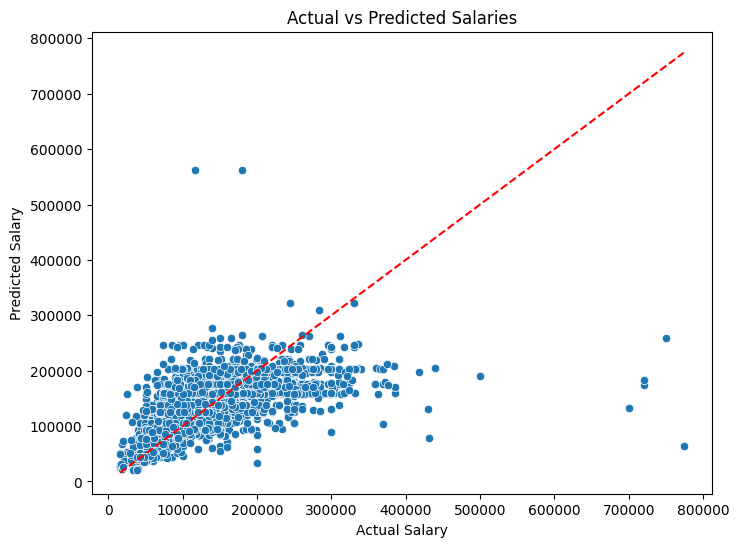

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=comparison['Actual Salary'], y=comparison['Predicted Salary'])
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.plot([comparison['Actual Salary'].min(), comparison['Actual Salary'].max()],
         [comparison['Actual Salary'].min(), comparison['Actual Salary'].max()],
         color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.show()


In [22]:
# Example: Predict salary for a new employee
new_employee = pd.DataFrame({
    'experience_level': ['SE'],
    'employment_type': ['FT'],
    'job_title': ['Data Scientist'],
    'employee_residence': ['US'],
    'company_location': ['US'],
    'company_size': ['M'],
    'remote_ratio': [0]
})


new_employee_encoded = pd.get_dummies(new_employee)

new_employee_encoded = new_employee_encoded.reindex(columns=X_encoded.columns, fill_value=0)


predicted_salary = model.predict(new_employee_encoded)
print(f"Predicted Salary (USD): {predicted_salary[0]:.2f}")


Predicted Salary (USD): 175486.17
